<a href="https://colab.research.google.com/github/sinhabhishree/predictive-ai-maintenance/blob/main/predict1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn optuna imbalanced-learn matplotlib


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()  # Allows file upload in Colab
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

Saving processed_data_with_features.csv to processed_data_with_features.csv


In [ ]:
# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
             Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.176283          0.033611       0.404079   
1  2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2  2019-01-01 02:00:00          0.362631         -0.712681       1.597605   
3  2019-01-01 03:00:00          0.162707         -0.000341       0.058888   
4  2019-01-01 04:00:00         -0.256026         -1.623271      -0.618951   

        RPM  Maintenance Required  Temp_Change  Vib_Change  Temperature_Mean  \
0  0.832177                     1    -0.000021   -0.000016               NaN   
1 -0.719691                     1     0.406404    0.190254               NaN   
2  0.428044                     1    -0.274656   -0.717490               NaN   
3  1.492644                     0    -0.141411    0.503204               NaN   
4  1.035398                     0    -0.296158   -1.146507          0.239311   

   Vibration_Mean  Pressure

In [ ]:
# Step 2: Handle Missing Values
print("\nChecking for Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)


Checking for Missing Values:
Timestamp               0
Temperature (°C)        0
Vibration (mm/s)        0
Pressure (Pa)           0
RPM                     0
Maintenance Required    0
Temp_Change             0
Vib_Change              0
Temperature_Mean        4
Vibration_Mean          4
Pressure_Mean           4
RPM_Mean                4
dtype: int64


In [ ]:
# Drop rows with missing values
data = data.dropna()
print("Rows with missing values removed.")

Rows with missing values removed.


In [ ]:
# Step 3: Select Target Column
print("\nColumns in the dataset:", list(data.columns))
target_column = input("Enter the Target Column (e.g., Failure): ")
features = [col for col in data.columns if col != target_column]


Columns in the dataset: ['Timestamp', 'Temperature (°C)', 'Vibration (mm/s)', 'Pressure (Pa)', 'RPM', 'Maintenance Required', 'Temp_Change', 'Vib_Change', 'Temperature_Mean', 'Vibration_Mean', 'Pressure_Mean', 'RPM_Mean']
Enter the Target Column (e.g., Failure): Maintenance Required


In [ ]:
# Step 4: Select Features
print("\nAvailable Features:", features)
selected_features = input("Enter Features for Prediction (comma-separated): ").split(',')
# Prepare features (X) and target (y)


Available Features: ['Timestamp', 'Temperature (°C)', 'Vibration (mm/s)', 'Pressure (Pa)', 'RPM', 'Temp_Change', 'Vib_Change', 'Temperature_Mean', 'Vibration_Mean', 'Pressure_Mean', 'RPM_Mean']
Enter Features for Prediction (comma-separated): Temperature (°C),Vibration (mm/s), Pressure (Pa), RPM


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_data_with_features.csv to processed_data_with_features (1).csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/processed_data_with_features.csv'  # Path in Google Colab
data = pd.read_csv(file_path)

# Select features and target
selected_features = ['Temperature (°C)','Vibration (mm/s)','Pressure (Pa)','RPM',]
target_column = 'Maintenance Required'

# Prepare features (X) and target (y)
X = data[selected_features]
y = data[target_column]

# Display shapes of X and y
print("Features (X):", X.shape)
print("Target (y):", y.shape)


Features (X): (43800, 4)
Target (y): (43800,)


In [ ]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Step 5: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Check scaled data
print("Scaled Data (First 5 Rows):")
print(pd.DataFrame(X_scaled, columns=selected_features).head())


Scaled Data (First 5 Rows):
   Temperature (°C)  Vibration (mm/s)  Pressure (Pa)       RPM
0          0.176283          0.033611       0.404079  0.832177
1          0.750960          0.302949       1.033265 -0.719691
2          0.362631         -0.712681       1.597605  0.428044
3          0.162707         -0.000341       0.058888  1.492644
4         -0.256026         -1.623271      -0.618951  1.035398


In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verify the output shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (30660, 4)
X_test shape: (13140, 4)
y_train shape: (30660,)
y_test shape: (13140,)


In [ ]:
# Step 6: Handle Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the new shapes of the balanced data
print("Original y_train distribution:", y_train.value_counts())
print("Resampled y_train_res distribution:", pd.Series(y_train_res).value_counts())


Original y_train distribution: Maintenance Required
1    15392
0    15268
Name: count, dtype: int64
Resampled y_train_res distribution: Maintenance Required
0    15392
1    15392
Name: count, dtype: int64


In [ ]:

# Step 7: Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)

# Fit PCA on the training data and transform both train and test sets
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

# Display the first five rows of the transformed training set
print("\nPCA Results (First 5 Rows):")
print(pd.DataFrame(X_train_pca, columns=["PC1", "PC2"]).head())




PCA Results (First 5 Rows):
        PC1       PC2
0  0.351636  0.157770
1  0.849904  1.052171
2  1.884701  1.133245
3  0.902494  1.199965
4 -0.447079  0.800530


In [ ]:
# Step 7: Model Training with Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    return roc_auc_score(y_test, y_pred)


In [ ]:
# Install Optuna if not installed
!pip install optuna

# Import necessary libraries
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from imblearn.over_sampling import RandomOverSampler

# Load dataset (replace with your own data)
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply resampling to balance the classes (if needed)
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Define the objective function
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Train a Random Forest Classifier with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train_res, y_train_res)

    # Predict probabilities (required for AUC calculation)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate the evaluation metric (AUC score) for multi-class classification
    return roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Retrieve the best hyperparameters
best_params = study.best_params

print("\nBest Hyperparameters:", best_params)


[I 2024-12-18 03:41:05,150] A new study created in memory with name: no-name-cf73d079-28e7-4771-8cce-230e366d9a2d
[I 2024-12-18 03:41:05,336] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 115, 'max_depth': 16, 'min_samples_split': 8}. Best is trial 0 with value: 1.0.
[I 2024-12-18 03:41:05,538] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 132, 'max_depth': 19, 'min_samples_split': 6}. Best is trial 0 with value: 1.0.
[I 2024-12-18 03:41:05,785] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 168, 'max_depth': 7, 'min_samples_split': 8}. Best is trial 0 with value: 1.0.
[I 2024-12-18 03:41:06,083] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 199, 'max_depth': 12, 'min_samples_split': 2}. Best is trial 0 with value: 1.0.
[I 2024-12-18 03:41:06,165] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 52, 'max_depth': 8, 'min_samples_split': 7}. Best is trial 0 with value: 1.0.
[I 2024-12-18 03:41


Best Hyperparameters: {'n_estimators': 115, 'max_depth': 16, 'min_samples_split': 8}


In [ ]:
# Train Final Model
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_res, y_train_res)
y_pred = best_model.predict(X_test)


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report
#step 8 model evaluation


# After running the optimization and getting the best model hyperparameters

# Train the best model with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
best_model.fit(X_train_res, y_train_res)

# Predict the class labels on the test set
y_pred = best_model.predict(X_test)

# Model Evaluation: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


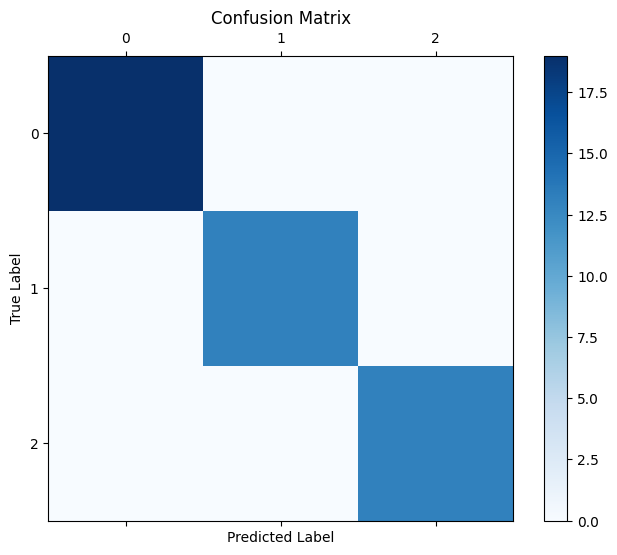

In [ ]:
# Visualize Confusion Matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.matshow(cm, cmap='Blues', fignum=1)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()



In [ ]:
# Check the length of the arrays
print(f"Length of selected_features: {len(selected_features)}")
print(f"Length of feature_importances: {len(feature_importances)}")

# If they match, create the DataFrame
if len(selected_features) == len(feature_importances):
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    print(importance_df)
else:
    print("Feature selection and feature importances don't match in length.")


Length of selected_features: 4
Length of feature_importances: 4
            Feature  Importance
3               RPM    0.440908
2     Pressure (Pa)    0.434575
0  Temperature (°C)    0.106165
1  Vibration (mm/s)    0.018351


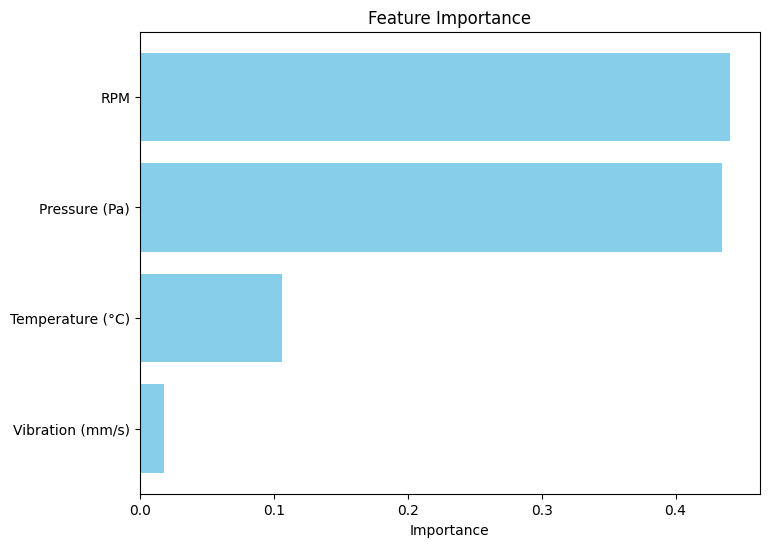

In [ ]:
# Check the length of the arrays
if len(selected_features) == len(feature_importances):
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Feature selection and feature importances don't match in length.")


In [ ]:
print(f"User data shape: {user_data_scaled.shape}")
print(f"Selected features: {selected_features}")


User data shape: (1, 3)
Selected features: ['Temperature (°C)', 'Vibration (mm/s)', 'Pressure (Pa)', 'RPM']



Feature Importance:


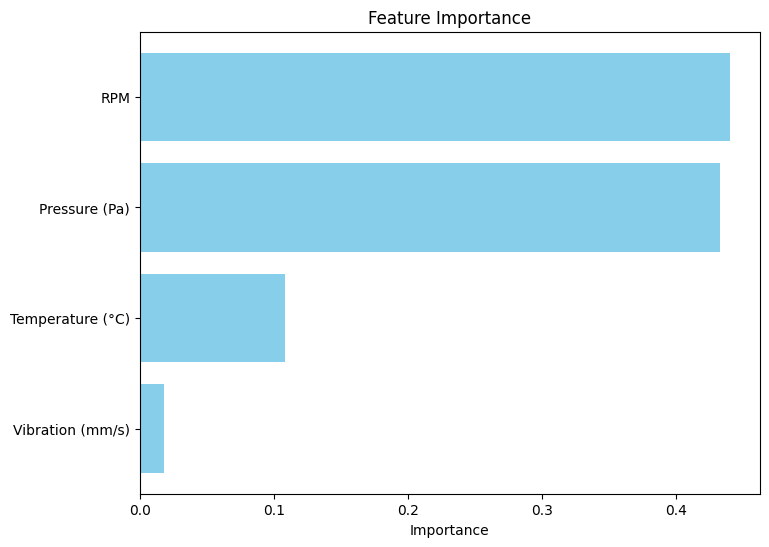

In [ ]:
#Step 9: Feature Importance
print("\nFeature Importance:")
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Check the length of the arrays
if len(selected_features) == len(feature_importances):
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Feature selection and feature importances don't match in length.")


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example dataset (replace this with your actual dataset)
df = pd.DataFrame({
    'Temperature (°C)': [20.5, 21.0, 19.8, 21.2],
    'Vibration (mm/s)': [1.1, 1.2, 1.3, 1.4],
    'Pressure (Pa)': [101.2, 102.3, 103.1, 100.8],
    'RPM': [1200, 1250, 1300, 1350],
    'Failure': [0, 1, 0, 1]  # Example target variable
})

# Separate features and target
X = df[['Temperature (°C)', 'Vibration (mm/s)', 'Pressure (Pa)', 'RPM']]
y = df['Failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Train a model (RandomForest as an example)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# List of selected features (should match the features used during training)
selected_features = ['Temperature (°C)', 'Vibration (mm/s)', 'Pressure (Pa)', 'RPM']

# Real-Time Prediction
print("\nEnter feature values for real-time prediction:")
user_inputs = [float(input(f"Enter value for {feature}: ")) for feature in selected_features]

# Scale user inputs and predict
user_data = np.array(user_inputs).reshape(1, -1)
user_data_scaled = scaler.transform(user_data)  # Scale using the fitted scaler
prediction = best_model.predict(user_data_scaled)

# Output prediction
result = "Failure Likely" if prediction[0] == 1 else "No Failure Predicted"
print("\nPrediction:", result)



Enter feature values for real-time prediction:
Enter value for Temperature (°C): 0.5
Enter value for Vibration (mm/s): 0.2
Enter value for Pressure (Pa): 1
Enter value for RPM: 0.2

Prediction: No Failure Predicted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
